# Ingest

In [1]:
import pandas as pd

products = pd.read_csv('PRODUCTS_TAKEHOME.csv')
transactions = pd.read_csv('TRANSACTION_TAKEHOME.csv')
users = pd.read_csv('USER_TAKEHOME.csv')

# First data clean

In [2]:
products.drop_duplicates('BARCODE',inplace=True)
transactions.drop_duplicates(inplace=True)
users.drop_duplicates(inplace=True)


# Remove an invalid row
products = products[products['BARCODE'] != 'nan']

In [ ]:
# Check if any receipt has no item information and if next assumption is correct
transactions['BARCODE'] = transactions['BARCODE'].fillna('Unknown')
transactions.groupby(['RECEIPT_ID', 'BARCODE']).max().isna().sum()

,0
PURCHASE_DATE,0
SCAN_DATE,0
STORE_NAME,0
USER_ID,0
FINAL_QUANTITY,0
FINAL_SALE,0


In [3]:
# Cleaning up extra rows per receipt record in transactions table
import numpy as np
transactions['FINAL_QUANTITY'] = transactions['FINAL_QUANTITY'].replace('zero',np.nan)
transactions['FINAL_SALE'] = transactions['FINAL_SALE'].replace(" ", np.nan)
print(transactions['RECEIPT_ID'].nunique())


24440


In [4]:
# Based on initial observation, Assume rows with nulls are duplicates and can be removed
transactions = transactions.sort_values(by=['FINAL_QUANTITY', 'FINAL_SALE'], na_position='last')
transactions = transactions.drop_duplicates(subset=['RECEIPT_ID', 'BARCODE'])
transactions

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
41063,dccc1e04-aef8-4ab0-adad-7fa41cd54125,2024-08-03,2024-08-04 10:12:33.541 Z,SEDANO'S,643d2b0b347839fdfa9831c0,4.608400e+04,0.01,0.05
42320,32752629-5882-4f01-8eee-dbbdb2756448,2024-08-27,2024-08-27 21:23:31.410 Z,WHOLE FOODS MARKET,60d67d1d525ce775c13d370c,NaN,0.04,0.24
27154,3dbe1f4c-6649-47b0-8328-7fc893efbb31,2024-07-07,2024-07-08 20:58:08.868 Z,KEY FOOD FRESH,5f299c8180f26b20811a4e70,4.094500e+04,0.09,0.12
48990,277b1f93-4de0-47bf-a094-319de868e601,2024-08-26,2024-08-26 11:56:03.764 Z,MEIJER,5fa7cf2a974a6c126e73e84c,4.094500e+04,0.23,0.29
34814,c60d5209-5b2c-4da0-a5d3-c4889e23e596,2024-08-16,2024-08-20 03:02:50.499 Z,SPROUTS FARMERS MARKET,66513cf77c0469953bf9b9f8,9.409480e+05,0.23,0.30
...,...,...,...,...,...,...,...,...
39605,90d6ebbc-4574-4ca3-853d-f8667c378870,2024-08-04,2024-08-16 16:36:20.906 Z,ALDI,623f868396e6b63587b1233d,3.111112e+11,8.00,21.44
40014,0e1aec9e-9804-4904-9022-0fcfaab91ce3,2024-08-09,2024-08-11 11:07:17.403 Z,ALBERTSONS,65d7ba07fe555d15f289d741,1.530001e+10,8.00,7.50
45130,69238b43-1cdd-4be4-8502-9577a970171c,2024-08-25,2024-08-26 15:32:33.602 Z,WALMART,62d861e81d76344f1a35fa02,2.700050e+10,9.00,12.06
39330,a40fbc1c-a368-45b9-962b-04fd23bca383,2024-07-07,2024-07-07 17:44:12.503 Z,ALDI,6679c22a86cc41b000cd0715,NaN,9.00,33.75


# Explore

In [ ]:
# Quick look at products table
products

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11
...,...,...,...,...,...,...,...
845547,Health & Wellness,Topical Muscle & Joint Relief Treatments,Braces & Wraps,NaN,NaN,NaN,7.223016e+11
845548,Snacks,Cookies,NaN,NaN,"TREEHOUSE FOODS, INC.",LOFTHOUSE,4.182082e+10
845549,Snacks,Candy,Confection Candy,NaN,HARIBO GMBH & CO KG,HARIBO,1.001672e+11
845550,Snacks,Nuts & Seeds,Hazelnuts,NaN,DOUBLE-COLA CO,JUMBO,7.539076e+10


In [ ]:
products.dropna(subset='CATEGORY_4')
# It looks like category 2 and category 3 show the most detail without getting specific about the product.
# This might be a good category to aggregate by and compare in the future

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
15,Health & Wellness,Hair Care,Hair Tools,Hair Brushes & Combs,PLACEHOLDER MANUFACTURER,BULK BUYS,7.310151e+11
25,Health & Wellness,Hair Removal,Shaving Gel & Cream,Women's Shaving Gel & Cream,PLACEHOLDER MANUFACTURER,WAHL,4.391710e+10
31,Health & Wellness,Skin Care,Lip Balms & Treatments,Lip Balms,THE CLOROX COMPANY,BURT'S BEES BEAUTY,7.928507e+11
39,Snacks,Puffed Snacks,Popcorn,Already Popped Popcorn,STONEHEDGE FARMS INC,STONEHEDGE FARMS,4.576433e+10
44,Health & Wellness,Hair Removal,Shaving Gel & Cream,Women's Shaving Gel & Cream,CONAIR LLC,CONAIR,1.915662e+11
...,...,...,...,...,...,...,...
845485,Beverages,Carbonated Soft Drinks,Cola,Regular Cola,PEPSICO,PEPSI,6.979373e+11
845497,Snacks,Puffed Snacks,Popcorn,Microwave Popcorn,REDNERS WAREHOUSE MARKET INC,REDNERS,2.578801e+10
845507,Snacks,Puffed Snacks,Popcorn,Microwave Popcorn,LEE THOMPSON FAWCETT CO.,BELL VIEW,7.098022e+10
845523,Health & Wellness,Medicines & Treatments,Digestive Health Medicines & Treatments,Nausea & Motion Sickness Medicines & Treatments,NaN,NaN,8.513290e+11


In [ ]:
# Looking at the cardinality (diversity in unique values) of the category names
products.nunique()

,0
CATEGORY_1,27
CATEGORY_2,121
CATEGORY_3,344
CATEGORY_4,127
MANUFACTURER,4354
BRAND,8122
BARCODE,841342


In [ ]:
transactions.nunique()

,0
RECEIPT_ID,24440
PURCHASE_DATE,89
SCAN_DATE,24440
STORE_NAME,954
USER_ID,17694
BARCODE,11027
FINAL_QUANTITY,87
FINAL_SALE,1435


In [5]:
# Create merged sales dataframe with everything
products['BARCODE'] = products['BARCODE'].fillna("0")
products['BARCODE'] = products['BARCODE'].astype(str)

transactions['BARCODE'] = transactions['BARCODE'].astype(str)
sales = transactions.merge(products, how='left', on='BARCODE')
sales = sales.merge(users, how='left', left_on='USER_ID', right_on='ID')


In [ ]:
# % null for products columns
(transactions.merge(products, how='left', on='BARCODE').isna().sum() * 100 / len(transactions)).round(1)


,0
RECEIPT_ID,0.0
PURCHASE_DATE,0.0
SCAN_DATE,0.0
STORE_NAME,0.0
USER_ID,0.0
BARCODE,0.0
FINAL_QUANTITY,0.0
FINAL_SALE,0.0
CATEGORY_1,40.2
CATEGORY_2,51.6


In [ ]:
# % null for users columns
(transactions.merge(users, how='left', left_on='USER_ID', right_on='ID').isna().sum() * 100 / len(transactions)).round(1)


,0
RECEIPT_ID,0.0
PURCHASE_DATE,0.0
SCAN_DATE,0.0
STORE_NAME,0.0
USER_ID,0.0
BARCODE,0.0
FINAL_QUANTITY,0.0
FINAL_SALE,0.0
ID,99.5
CREATED_DATE,99.5


In [ ]:
# total non-null values in merged dataframe
sales.notna().sum()

,0
RECEIPT_ID,24795
PURCHASE_DATE,24795
SCAN_DATE,24795
STORE_NAME,24795
USER_ID,24795
BARCODE,24795
FINAL_QUANTITY,24795
FINAL_SALE,24795
CATEGORY_1,14817
CATEGORY_2,11989


# SQL Queries

In [6]:
!pip install pandasql -q


  Preparing metadata (setup.py) ... done


In [7]:
# What are the top 5 brands by sales among users that have had their account for at least six months?

# A high percentage of user data and products is missing for the transactions data available.
# This query assumes that the data for users is a random sample of the full user database, so what user information that I do have
# is a random sample that is representative of the population, so I can extrapolate user behavior from what we know.
# It would be the same query if all the data was provided rather than a sample. This same logic applies with the other queries.
import pandasql as ps

query = """
SELECT
    BRAND,
    COUNT(DISTINCT RECEIPT_ID) AS RECEIPT_COUNT,
    SUM(FINAL_SALE) AS TOTAL_SALES,
    SUM(FINAL_QUANTITY) AS TOTAL_QUANTITY
FROM (
    SELECT
        BRAND, RECEIPT_ID, FINAL_SALE, FINAL_QUANTITY,
        12 * (strftime('%Y', t.SCAN_DATE) - strftime('%Y', u.CREATED_DATE)) +
        (strftime('%m', t.SCAN_DATE) - strftime('%m', u.CREATED_DATE)) AS MTHS_SINCE_ACCOUNT_OPENED
    FROM transactions t
    JOIN users u ON t.USER_ID = u.ID
    JOIN products p ON t.BARCODE = p.BARCODE
) AS filtered_data
WHERE MTHS_SINCE_ACCOUNT_OPENED >= 6
GROUP BY BRAND
ORDER BY RECEIPT_COUNT DESC, TOTAL_SALES DESC
LIMIT 10;

"""
top_brands = ps.sqldf(query, locals())
top_brands

,BRAND,RECEIPT_COUNT,TOTAL_SALES,TOTAL_QUANTITY
0,DOVE,3,30.91,3.0
1,NERDS CANDY,3,6.25,3.0
2,TRIDENT,2,23.36,2.0
3,GREAT VALUE,2,9.30,2.0
4,MEIJER,2,8.18,2.0
5,SOUR PATCH KIDS,2,7.44,2.0
6,None,2,2.69,2.0
7,CVS,1,72.00,1.0
8,COORS LIGHT,1,17.48,1.0
9,TRESEMMÉ,1,14.58,2.0


In [50]:
# Who are Fetch’s power users?

# I would value high engagement/frequency, high spending, and long-term customers who are also curious and explorative buyers
# so they shop at many stores as the users with the largest Customer Lifetime value potential.
# To find these power users, I would find the highest rankers between all these variables.
# Then I could shortlist the top 0.1%, top 1%, top 5%, etc. for any purpose.

# Note: for now the variables are weighted equally to calculate the composite rank, but they could be weighted

query = """
WITH user_activity AS (
    SELECT
        USER_ID,
        COUNT(RECEIPT_ID) AS total_receipts,
        SUM(FINAL_SALE) AS total_spent,
        (strftime('%Y', SCAN_DATE) - strftime('%Y', CREATED_DATE)) * 12 +
        (strftime('%m', SCAN_DATE) - strftime('%m', CREATED_DATE)) AS account_age_months,
        COUNT(DISTINCT STORE_NAME) AS unique_stores

    FROM transactions t
    JOIN users u ON t.USER_ID = u.ID
    JOIN products p ON t.BARCODE = p.BARCODE
    GROUP BY t.USER_ID
),

ranked_users AS (
    SELECT
        USER_ID, total_receipts, total_spent, account_age_months,
        RANK() OVER (ORDER BY total_receipts DESC) AS rank_receipts,
        RANK() OVER (ORDER BY total_spent DESC) AS rank_spent,
        RANK() OVER (ORDER BY account_age_months DESC) AS rank_account_age,
        RANK() OVER (ORDER BY unique_stores DESC) AS rank_stores
    FROM user_activity
)

SELECT
    USER_ID,
    (rank_receipts + rank_spent + rank_account_age + rank_stores)/4 AS avg_rank,
    rank_receipts, rank_spent, rank_account_age, rank_stores,
    total_receipts, total_spent, account_age_months
FROM ranked_users
ORDER BY avg_rank ASC



"""
power_users = ps.sqldf(query, locals())
power_users


,USER_ID,avg_rank,rank_receipts,rank_spent,rank_account_age,rank_stores,total_receipts,total_spent,account_age_months
0,5b441360be53340f289b0795,3,2,8,2,1,2,10.33,72
1,5ca54049adfcb4140b54e1bf,5,2,14,5,1,2,7.24,65
2,5d191765c8b1ba28e74e8463,7,13,3,7,6,1,17.48,60
3,610a8541ca1fab5b417b5d33,9,2,16,18,1,2,6.68,36
4,5c6c2998b06c0045a4fddc74,9,2,22,6,6,2,5.46,64
5,5fd4fb485f410d44bae3a776,9,13,4,15,6,1,14.58,45
6,5f9414c65896841696c17359,9,13,5,14,6,1,11.97,46
7,5e6d0beb01ecdd13986852e8,9,13,11,9,6,1,8.97,53
8,62ffec490d9dbaff18c0a999,10,2,2,32,6,2,23.36,23
9,5bb79c65b0a16836db35bbf1,10,13,21,3,6,1,5.79,70


In [12]:
# At what percent has Fetch grown year over year?

# There is only previous years' data in the users table. If not, a volume of receipts, amount spent, and long-term users
# (2-yr retention) year-over-year would be other ways to measure Fetch's growth.

# A valuable metric to track is total users created over the years from this sample.

query = """
WITH yearly_users AS (
    SELECT
        strftime('%Y', CREATED_DATE) AS year,
        COUNT(DISTINCT ID) AS curr_total_users
    FROM users
    GROUP BY year
),
ranked_growth AS (
    SELECT
        year,
        LAG(curr_total_users) OVER (ORDER BY year) AS prev_year_users,
        curr_total_users,
        ROUND(((curr_total_users - LAG(curr_total_users) OVER (ORDER BY year)) * 100.0) /
              NULLIF(LAG(curr_total_users) OVER (ORDER BY year), 0), 1) AS yoy_growth
    FROM yearly_users
)
SELECT * FROM ranked_growth
WHERE yoy_growth IS NOT NULL;  -- Remove first year where growth cannot be calculated


"""
growth_result = ps.sqldf(query, locals())
growth_result


,year,prev_year_users,curr_total_users,yoy_growth
0,2015,30,51,70.0
1,2016,51,70,37.3
2,2017,70,644,820.0
3,2018,644,2168,236.6
4,2019,2168,7093,227.2
5,2020,7093,16883,138.0
6,2021,16883,19159,13.5
7,2022,19159,26807,39.9
8,2023,26807,15464,-42.3
9,2024,15464,11631,-24.8


# Visuals

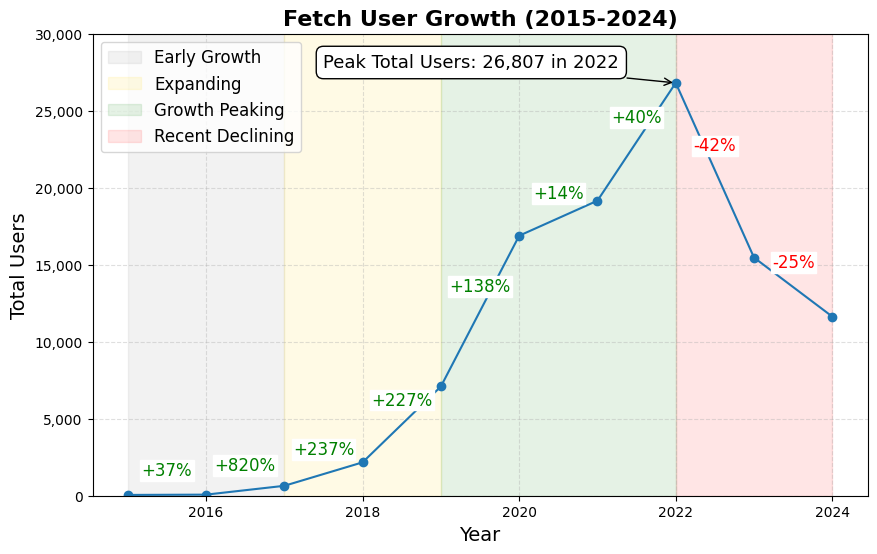

In [70]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

growth_result["year"] = growth_result["year"].astype(int)

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total users
ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("Total Users", fontsize=14)
ax1.set_ylim(0, 30000)
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

ax1.plot(growth_result["year"], growth_result["curr_total_users"], marker="o", linestyle="-", color="tab:blue")
ax1.grid(True, linestyle="--", alpha=0.4)

# Add shading to year ranges
ax1.axvspan(2015, 2017, color="gray", alpha=0.1, label="Early Growth")
ax1.axvspan(2017, 2019, color="gold", alpha=0.1, label="Expanding")
ax1.axvspan(2019, 2022, color="green", alpha=0.1, label="Growth Peaking")
ax1.axvspan(2022, 2024, color="red", alpha=0.1, label="Recent Declining")

# Add data labels for YoY Growth
for i in range(len(growth_result["year"]) - 1):
    mid_x = (growth_result["year"][i] + growth_result["year"][i + 1]) / 2  # x-axis midpoint
    mid_y = (growth_result["curr_total_users"][i] + growth_result["curr_total_users"][i + 1]) / 2 + 1000
    color = "green" if growth_result['yoy_growth'][i + 1] > 0 else "red"
    label_text = f"+{growth_result['yoy_growth'][i + 1]:.0f}%" if growth_result['yoy_growth'][i + 1] > 0 else f"{growth_result['yoy_growth'][i + 1]:.0f}%"
    ax1.text(mid_x, mid_y, label_text, fontsize=12, color=color, ha="center", va="bottom", bbox=dict(facecolor='white', edgecolor='white', pad=1.0))

# maximum user count
max_users = growth_result["curr_total_users"].max()
max_year = growth_result.loc[growth_result["curr_total_users"].idxmax(), "year"]
# ax1.scatter(max_year, max_users, color="gold", marker="x",edgecolors="black", s=90, zorder=3)
ax1.annotate(
    f"Peak Total Users: {max_users:,} in {max_year}",
    xy=(max_year, max_users),
    xytext=(max_year - 4.5, max_users + 1000),
    arrowprops=dict(facecolor="black", edgecolor="black", arrowstyle="->"),
    fontsize=13,
    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.4")
)

# Title
plt.title("Fetch User Growth (2015-2024)", fontsize=16, fontweight="bold")
ax1.legend(fontsize=12, loc="upper left")

# Show plot
plt.show()


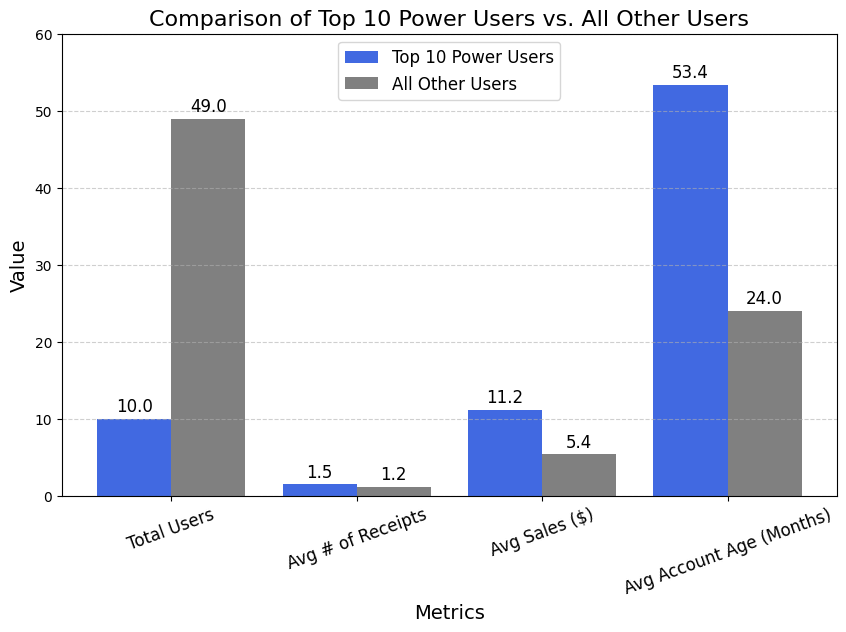

In [66]:
# Restructure dataframe
metrics = ["Total Users", "Avg # of Receipts", "Avg Sales ($)", "Avg Account Age (Months)"]
top_users = power_users[:10].copy()
all_other_users = power_users[10:].copy()

top_user_values = [top_users["USER_ID"].nunique(), top_users["total_receipts"].mean(), top_users["total_spent"].mean(), top_users["account_age_months"].mean()]
other_users_values = [all_other_users["USER_ID"].nunique(), all_other_users["total_receipts"].mean(), all_other_users["total_spent"].mean(), all_other_users["account_age_months"].mean()]

# Bar Plot to Compare Top 10 Users vs. All Other Users
x = np.arange(len(metrics))
width = 0.4

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, top_user_values, width, label="Top 10 Power Users", color="royalblue")
bars2 = ax.bar(x + width/2, other_users_values, width, label="All Other Users", color="gray")

# Add labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:,.1f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha="center", fontsize=12, color="black")

# Format
ax.set_ylabel("Value", fontsize=14)
ax.set_xlabel("Metrics", fontsize=14)
ax.set_title("Comparison of Top 10 Power Users vs. All Other Users", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12, rotation=20)
ax.legend(fontsize=12)
ax.set_ylim(0,60)
ax.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()